# 1. Introduction
Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not.

In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!

![](img/lego_bricks1.jpeg)

# Understanding Data
A comprehensive database of lego blocks is provided by Rebrickable. The data is available as csv files and the schema is shown below.

![downloads_schema.png](img/downloads_schema.png)

In [158]:
#Importing the Visualization and Computational Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
#Importing the datasets - colors and sets
colors = pd.read_csv("datasets/colors.csv")
sets = pd.read_csv("datasets/sets.csv", dtype={'year': np.int, 'theme_id': np.str})

In [160]:
#Exploring the colors dataset
print ("Printing head of Colors dataset\n")
print (colors.head())
print ("\nPrinting tail of Colors dataset\n")
print (colors.tail())

Printing head of Colors dataset

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f

Printing tail of Colors dataset

       id                          name     rgb is_trans
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f


In [161]:
#Distinct colors
num_colors = len(colors.name.unique())
print ("Number of Unique Colors = %s " % num_colors)

Number of Unique Colors = 135 


In [162]:
#Understaning summary of transparent and non-transparent colors
colors_summary = colors.groupby(colors['is_trans']).count()
print (colors_summary)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


In [163]:
# Splitting into transparent and non transparent dataframes
colors_transparent = colors.query("is_trans == 't'")
colors_ntransparent = colors.query("is_trans == 'f'")

In [164]:
#Count of entries by color in transparent set
transparent_entries = colors_transparent.groupby(colors['rgb']).agg({'name':'count'})
print (transparent_entries.head())


        name
rgb         
0020A0     1
635F52     2
68BCC5     1
84B68D     1
96709F     1


In [165]:
#Count of entries by color in non-transparent set
ntransparent_entries = colors_ntransparent.groupby(colors['rgb']).agg({'name':'count'})
print (ntransparent_entries.head())

        name
rgb         
000000     3
0033B2     1
0055BF     1
008F9B     1
05131D     2


In [166]:
#Exploring the sets dataset
print ("Printing head of Sets dataset\n")
print (sets.head())
print ("\nPrinting tail of Sets dataset\n")
print (sets.tail())

Printing head of Sets dataset

  set_num                        name  year theme_id  num_parts
0    00-1             Weetabix Castle  1970      414      471.0
1  0011-2           Town Mini-Figures  1978       84       12.0
2  0011-3  Castle 2 for 1 Bonus Offer  1987      199        2.0
3  0012-1          Space Mini-Figures  1979      143       12.0
4  0013-1          Space Mini-Figures  1979      143       12.0

Printing tail of Sets dataset

             set_num                                               name  year  \
11857    Wauwatosa-1  LEGO Store Grand Opening Exclusive Set, Mayfai...  2012   
11858   WHITEHOUSE-1                                  Micro White House  2015   
11859    Wiesbaden-1  LEGO Store Grand Opening Exclusive Set, Wiesba...  2010   
11860  WishingWell-1                     Wishing Well [Toys R Us Promo]  2013   
11861        wwgp1-1                Wild West Limited Edition Gift Pack  1996   

      theme_id  num_parts  
11857      408       15.0  
11858     

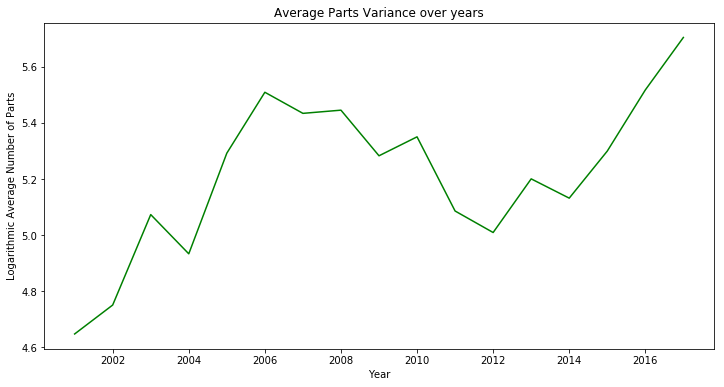

In [167]:
#Summary of average number of parts per year after 2000
parts_after_2000 = sets.query("year > 2000")
parts_by_year = parts_after_2000.groupby('year').agg({"num_parts": "mean"})

# Plot trends in average number of parts by year
plt.plot(np.log(parts_by_year.num_parts), color='green')
plt.xlabel('Year')
plt.ylabel('Logarithmic Average Number of Parts')
plt.title('Average Parts Variance over years')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


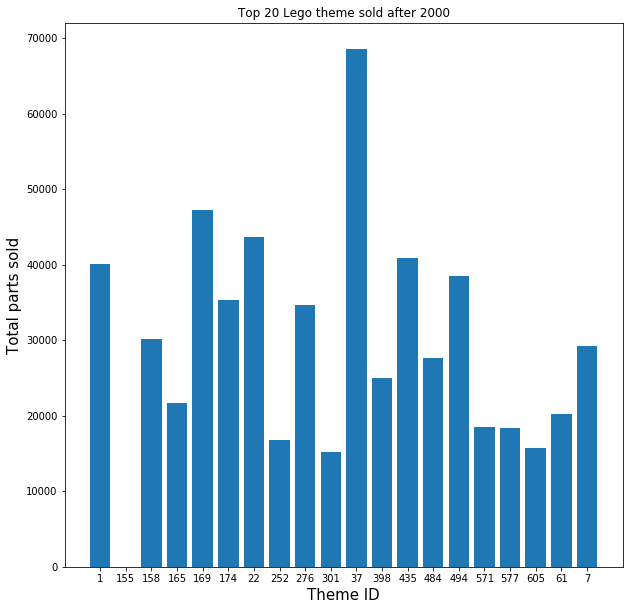

In [168]:
# Summary of average number of parts by theme id after 2000 for top 20 themes
most_sold_theme = parts_after_2000.groupby('theme_id').agg({"num_parts": "sum"}).sort_values(by='num_parts', ascending=0).head(n=20)
#Bar chart visualisation
plt.bar(most_sold_theme.index.get_level_values(0).map(str), most_sold_theme.num_parts)
plt.xlabel('Theme ID', fontsize=15)
plt.ylabel('Total parts sold', fontsize=15)
plt.title('Top 20 Lego theme sold after 2000')
plt.rcParams["figure.figsize"] = (12,6)
plt.show()



Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes.